In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [4]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0


* id: Unique ID for the customer
* Gender: Gender of the customer
* Age: Age of the customer
* Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
* Region_Code: Unique code for the region of the customer
* Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
* Vehicle_Age: Age of the Vehicle
* Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
* Annual_Premium: The amount customer needs to pay as premium in the year
* Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* Vintage: Number of Days, Customer has been associated with the company
* Response: [1 : Customer is interested, 0 : Customer is not interested]

## EDA

In [5]:
df.shape

(150359, 12)

In [6]:
# checking for null values
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,1
Vehicle_Age,1
Vehicle_Damage,1
Annual_Premium,1
Policy_Sales_Channel,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150359 entries, 0 to 150358
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    150359 non-null  int64  
 1   Gender                150359 non-null  object 
 2   Age                   150359 non-null  int64  
 3   Driving_License       150359 non-null  int64  
 4   Region_Code           150359 non-null  float64
 5   Previously_Insured    150358 non-null  float64
 6   Vehicle_Age           150358 non-null  object 
 7   Vehicle_Damage        150358 non-null  object 
 8   Annual_Premium        150358 non-null  float64
 9   Policy_Sales_Channel  150358 non-null  float64
 10  Vintage               150358 non-null  float64
 11  Response              150358 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 13.8+ MB


In [8]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,150359.0000,150359.000000,150359.000000,150359.000000,150358.000000,150358.000000,150358.000000,150358.000000,150358.000000
mean,75180.0000,38.831197,0.997898,26.385058,0.457142,30508.468083,112.075360,154.412336,0.122534
std,43405.0489,15.512053,0.045796,13.238390,0.498161,17244.322182,54.179701,83.714972,0.327903
min,1.0000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,37590.5000,25.000000,1.000000,15.000000,0.000000,24372.000000,29.000000,82.000000,0.000000
50%,75180.0000,36.000000,1.000000,28.000000,0.000000,31619.500000,135.000000,154.000000,0.000000
75%,112769.5000,49.000000,1.000000,35.000000,1.000000,39368.000000,152.000000,227.000000,0.000000
max,150359.0000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
# checking distribution for target column
df['Response'].value_counts()

,count
Response,
0.0,131934
1.0,18424


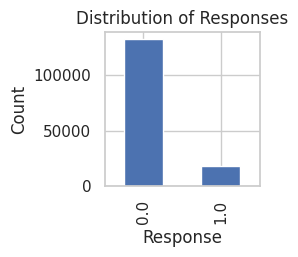

In [10]:
value_counts = df['Response'].value_counts()

plt.figure(figsize=(2, 2))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses')

# Show the plot
plt.show()

<Axes: >

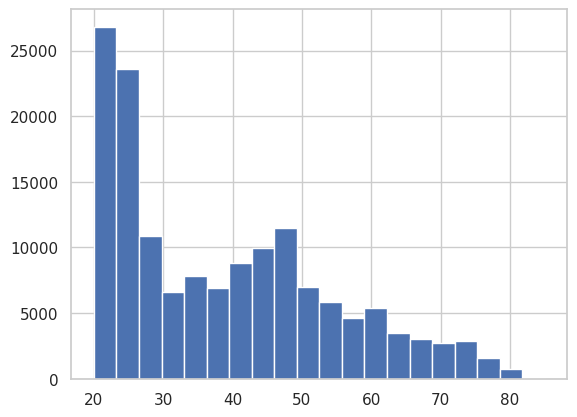

In [11]:
# checking distribution for age col
df['Age'].hist(bins=20)

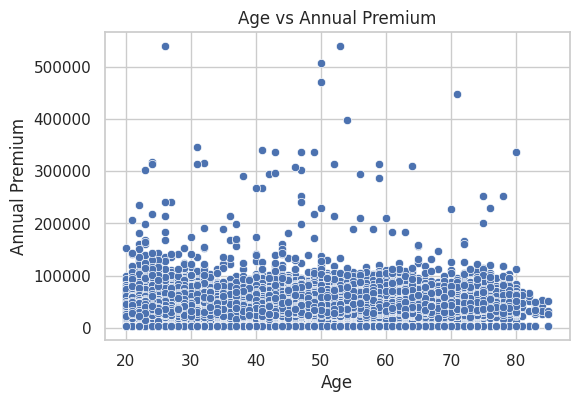

In [12]:
# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Annual_Premium', data=df)
plt.title('Age vs Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()

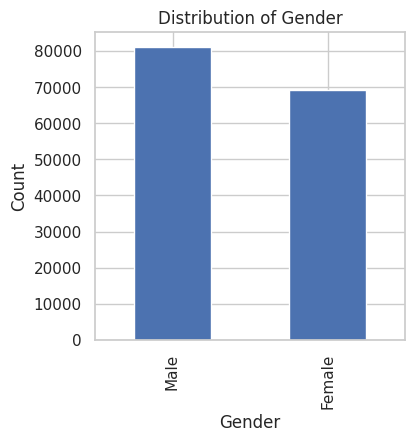

In [13]:
# Gender-Response comparison

value_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()

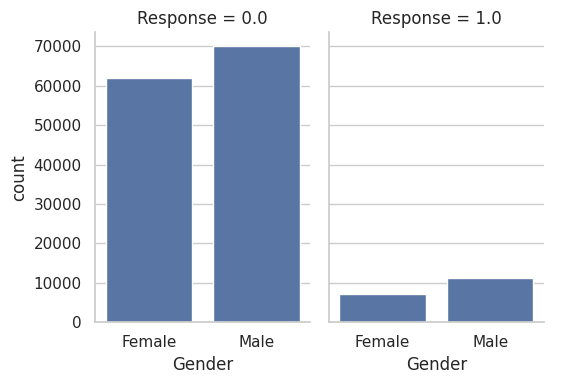

In [14]:
data = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

g = sns.catplot(x="Gender", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

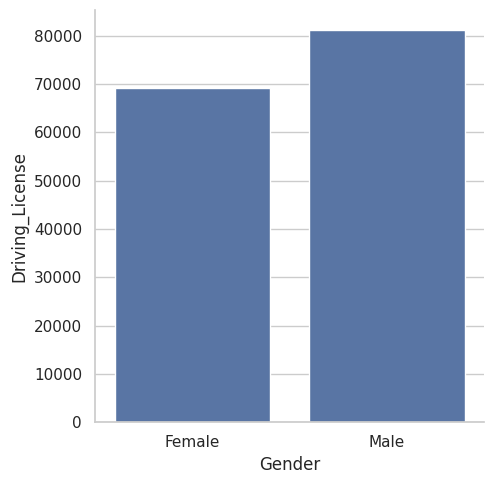

In [15]:
# driving license by gender

data=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License", data=data, kind="bar");

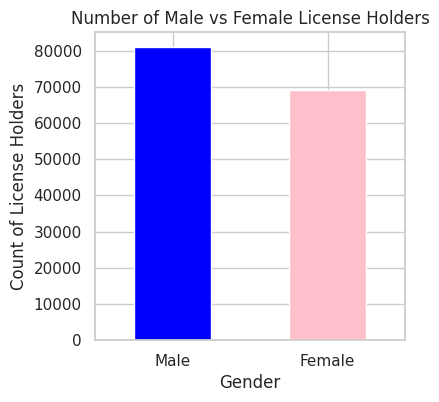

In [16]:
# Filter for only license holders (Driving_License == 1)
license_holders = df[df['Driving_License'] == 1]

# Group by Gender and count the number of license holders per gender
gender_counts = license_holders['Gender'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Male vs Female License Holders')
plt.xlabel('Gender')
plt.ylabel('Count of License Holders')
plt.xticks(rotation=0)
plt.show()


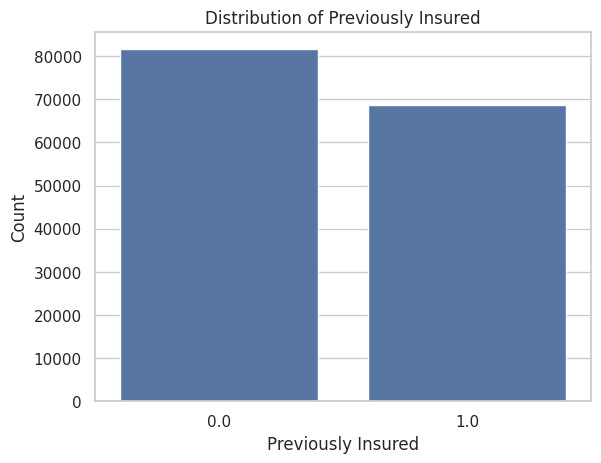

In [17]:
# customers with existing insurance

sns.countplot(x="Previously_Insured", data=df)
plt.title("Distribution of Previously Insured")
plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.show()

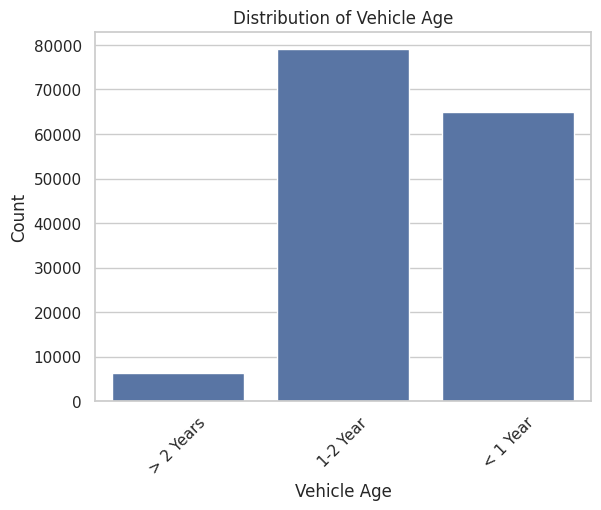

In [18]:
# checking vehicle age dist

sns.countplot(x='Vehicle_Age', data=df)
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()

In [19]:
# Response vs Vehicle_Age

data=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data

,Vehicle_Age,Response,count
0,1-2 Year,0.0,65307
1,1-2 Year,1.0,13706
2,< 1 Year,0.0,62199
3,< 1 Year,1.0,2830
4,> 2 Years,0.0,4428
5,> 2 Years,1.0,1888


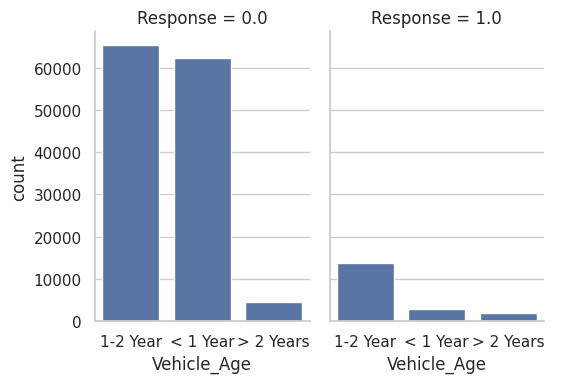

In [20]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=data, kind="bar",
                height=4, aspect=.7);

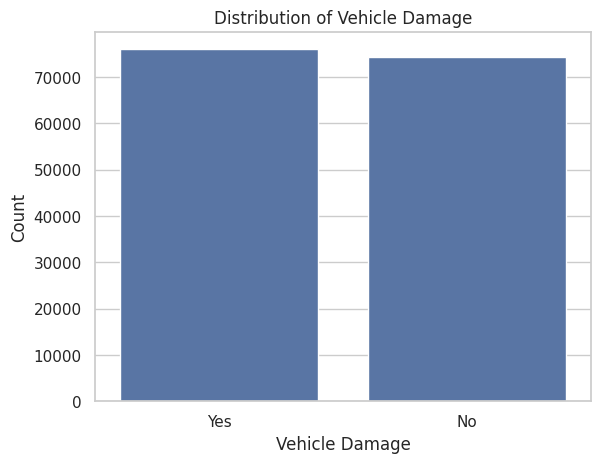

In [21]:
# dist for Vehicle_Damage col

sns.countplot(data=df, x='Vehicle_Damage')
plt.title('Distribution of Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

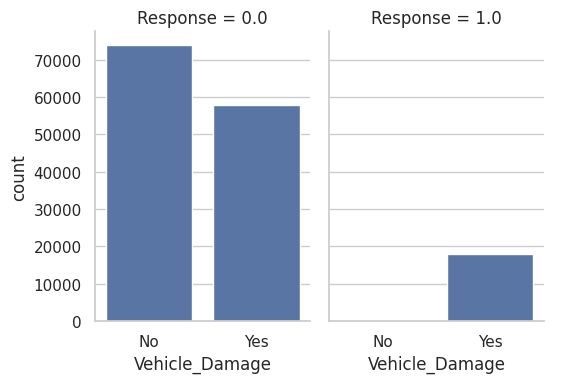

In [22]:
data = df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

In [23]:
# checking stats for Annual_Premium
df['Annual_Premium'].describe()

,Annual_Premium
count,150358.000000
mean,30508.468083
std,17244.322182
min,2630.000000
25%,24372.000000
50%,31619.500000
75%,39368.000000
max,540165.000000


<Axes: >

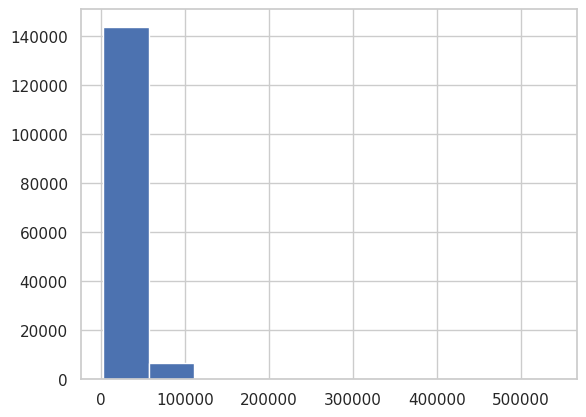

In [24]:
df['Annual_Premium'].hist(bins=10)

In [25]:
df[df['Annual_Premium']>200000]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1412,1413,Female,41,1,28.0,0.0,1-2 Year,Yes,267698.0,124.0,63.0,1.0
11319,11320,Female,50,1,46.0,1.0,1-2 Year,No,508073.0,26.0,192.0,0.0
13426,13427,Female,47,1,28.0,0.0,1-2 Year,Yes,301762.0,124.0,22.0,0.0
15024,15025,Female,32,1,28.0,0.0,1-2 Year,Yes,315565.0,155.0,150.0,0.0
25532,25533,Male,50,1,28.0,0.0,1-2 Year,Yes,229935.0,122.0,64.0,1.0
35280,35281,Female,42,1,28.0,1.0,1-2 Year,No,294209.0,26.0,238.0,0.0
37855,37856,Male,47,1,28.0,0.0,1-2 Year,Yes,336395.0,122.0,69.0,1.0
39479,39480,Female,36,1,28.0,0.0,1-2 Year,Yes,214455.0,26.0,249.0,0.0
43940,43941,Female,78,1,28.0,0.0,1-2 Year,Yes,253362.0,26.0,198.0,1.0
50167,50168,Male,56,1,28.0,0.0,1-2 Year,Yes,211132.0,26.0,109.0,0.0


## Data Preprocessing

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150359 entries, 0 to 150358
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    150359 non-null  int64  
 1   Gender                150359 non-null  object 
 2   Age                   150359 non-null  int64  
 3   Driving_License       150359 non-null  int64  
 4   Region_Code           150359 non-null  float64
 5   Previously_Insured    150358 non-null  float64
 6   Vehicle_Age           150358 non-null  object 
 7   Vehicle_Damage        150358 non-null  object 
 8   Annual_Premium        150358 non-null  float64
 9   Policy_Sales_Channel  150358 non-null  float64
 10  Vintage               150358 non-null  float64
 11  Response              150358 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 13.8+ MB


In [27]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [28]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,1,76,1,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0


In [29]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> float64
Vehicle_Age >> object
Vehicle_Damage >> object
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> float64
Response >> float64


In [30]:
# creating dummy cols for categorical features

df=pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0.0,40454.0,26.0,217.0,1.0,False,True,True
1,2,1,76,1,3.0,0.0,33536.0,26.0,183.0,0.0,False,False,False


In [31]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> float64
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> float64
Response >> float64
Vehicle_Age_< 1 Year >> bool
Vehicle_Age_> 2 Years >> bool
Vehicle_Damage_Yes >> bool


In [32]:
# cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in cat_feat:
    df[column] = df[column].astype('str')

In [33]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0.0,40454.0,26.0,217.0,1.0,0,1,1
1,2,1,76,1,3.0,0.0,33536.0,26.0,183.0,0.0,0,0,0
2,3,1,47,1,28.0,0.0,38294.0,26.0,27.0,1.0,0,1,1
3,4,1,21,1,11.0,1.0,28619.0,152.0,203.0,0.0,1,0,0
4,5,0,29,1,41.0,1.0,27496.0,152.0,39.0,0.0,1,0,0


In [38]:
df.isnull().sum()
df.dropna(inplace = True)

In [39]:
from imblearn.combine import SMOTEENN
from collections import Counter

# 1. Separate features and target
X = df.drop(columns=["Response"])
y = df["Response"]

# 2. Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# 3. Put the data back into df
df = X_resampled.copy()
df["Response"] = y_resampled

# 4. Print class distribution
print("Resampled class distribution:", Counter(df["Response"]))


Resampled class distribution: Counter({1.0: 90992, 0.0: 61774})


In [40]:
# scaling the data

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

# also, dropping id col now
id=df.id
df=df.drop('id',axis=1)

In [41]:
# train-test split

from sklearn.model_selection import train_test_split

train_target=df['Response']
train=df.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [42]:
train_target

,Response
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
152761,1.0
152762,1.0
152763,1.0
152764,1.0


In [43]:
train.head(1)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1.0,2.677888,1.0,3.0,0.0,0.063459,26.0,0.368994,0.0,0.0,0.0


## Model Trainer - Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

my_params = {
    'n_estimators': [300],
    'min_samples_split': [7],
    'min_samples_leaf': [6],
    'max_depth': [10],
    'criterion': ['entropy']
}

clf = RandomForestClassifier(random_state=42)
model = RandomizedSearchCV(
    estimator=clf,
    param_distributions=my_params,
    n_iter=1,  # Only 1 combo, so no need for 10 iterations
    cv=4,
    verbose=1,
    random_state=101,
    n_jobs=-1
)

model.fit(x_train, y_train)


Fitting 4 folds for each of 1 candidates, totalling 4 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': [10],
                                        'min_samples_leaf': [6],
                                        'min_samples_split': [7],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [48]:
best_params = model.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'entropy'}


In [ ]:
# save model

import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading back pickle file

rf_load = pickle.load(open(filename, 'rb'))

## Model Evaluation

In [49]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83     15292
         1.0       0.85      0.96      0.91     22900

    accuracy                           0.88     38192
   macro avg       0.89      0.86      0.87     38192
weighted avg       0.89      0.88      0.88     38192

